In [1]:
# Vamos rodar gráficos estáticos, usar o estilo "seaborn-whitegrid" 
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.ticker as ticker
import pandas as pd
from pandas_ods_reader import read_ods
%matplotlib inline

In [2]:
### Colunas dos outputs do modo e ordem que o LibRadtran escreve:
cols = ['comp', 'zout', 'albedo', 'T', 'T_sur', 'TCC', 'sza', 'edir', 'eup']

In [3]:
### Caminhos e listagem dos arquivos .out:
pasta_limpos = '/home/andre/libRadtran-2.0.4/codigos_doutorado/outs_espectros_final/limpo/'
pasta_poluidos = '/home/andre/libRadtran-2.0.4/codigos_doutorado/outs_espectros_final/poluido/'
pasta_trans2 = '/home/andre/libRadtran-2.0.4/codigos_doutorado/outs_espectros_final/trans2/'
pasta_trans3 = '/home/andre/libRadtran-2.0.4/codigos_doutorado/outs_espectros_final/trans3/'
pasta_trans4 = '/home/andre/libRadtran-2.0.4/codigos_doutorado/outs_espectros_final/trans4/'

data_limpos = sorted(glob.glob(pasta_limpos+'import_????_limpa_??_??_2014.out'))
data_poluidos = sorted(glob.glob(pasta_poluidos+'import_????_poluida_??_??_2014.out'))
data_trans2 = sorted(glob.glob(pasta_trans2+'import_????_trans2_??_??_2014.out'))
data_trans3 = sorted(glob.glob(pasta_trans3+'import_????_trans3_??_??_2014.out'))
data_trans4 = sorted(glob.glob(pasta_trans4+'import_????_trans4_??_??_2014.out'))

In [4]:
### Lendo e armazenando os dados e os dias do período limpo:
dadosl, diasl = [], []
for file in data_limpos:
    data = pd.read_csv(file, skiprows=0, sep="\s+", names=cols, na_values=["-9999"])
    data.eup = data.eup/1000
    dia = file.split('/')[-1].split('_')[3]
    mes = file.split('/')[-1].split('_')[4]
    ano = file.split('/')[-1].split('_')[-1].split('.')[0]
    string = dia+'/'+mes+'/'+ano
    dadosl.append(data)
    diasl.append(string)

### Lendo e armazenando os dados e os dias do período poluído:
dadosp, diasp = [], []
for file in data_poluidos:
    data = pd.read_csv(file, skiprows=0, sep="\s+", names=cols, na_values=["-9999"])
    data.eup = data.eup/1000
    dia = file.split('/')[-1].split('_')[3]
    mes = file.split('/')[-1].split('_')[4]
    ano = file.split('/')[-1].split('_')[-1].split('.')[0]
    string = dia+'/'+mes+'/'+ano
    dadosp.append(data)
    diasp.append(string)
    
### Lendo e armazenando os dados e os dias do período trans2:
dadost2, diast2 = [], []
for file in data_trans2:
    data = pd.read_csv(file, skiprows=0, sep="\s+", names=cols, na_values=["-9999"])
    data.eup = data.eup/1000
    dia = file.split('/')[-1].split('_')[3]
    mes = file.split('/')[-1].split('_')[4]
    ano = file.split('/')[-1].split('_')[-1].split('.')[0]
    string = dia+'/'+mes+'/'+ano
    dadost2.append(data)
    diast2.append(string)
    
### Lendo e armazenando os dados e os dias do período trans3:
dadost3, diast3 = [], []
for file in data_trans3:
    data = pd.read_csv(file, skiprows=0, sep="\s+", names=cols, na_values=["-9999"])
    data.eup = data.eup/1000
    dia = file.split('/')[-1].split('_')[3]
    mes = file.split('/')[-1].split('_')[4]
    ano = file.split('/')[-1].split('_')[-1].split('.')[0]
    string = dia+'/'+mes+'/'+ano
    dadost3.append(data)
    diast3.append(string)
    
### Lendo e armazenando os dados e os dias do período trans4:
dadost4, diast4 = [], []
for file in data_trans4:
    data = pd.read_csv(file, skiprows=0, sep="\s+", names=cols, na_values=["-9999"])
    data.eup = data.eup/1000
    dia = file.split('/')[-1].split('_')[3]
    mes = file.split('/')[-1].split('_')[4]
    ano = file.split('/')[-1].split('_')[-1].split('.')[0]
    string = dia+'/'+mes+'/'+ano
    dadost4.append(data)
    diast4.append(string)

In [5]:
### Dias do período limpo:
seriesdias = []
for i in range(len(dadosl)):
    d = [diasl[i]]
    l = d*len(dadosl[i])
    seriesdias.append(l)
for i in range(len(dadosl)):
    dadosl[i]['dia'] = seriesdias[i]
    
### Dias do período poluído:
seriesdias = []
for i in range(len(dadosp)):
    d = [diasp[i]]
    l = d*len(dadosp[i])
    seriesdias.append(l)
for i in range(len(dadosp)):
    dadosp[i]['dia'] = seriesdias[i]
    
### Dias do período trans2:
seriesdias = []
for i in range(len(dadost2)):
    d = [diast2[i]]
    l = d*len(dadost2[i])
    seriesdias.append(l)
for i in range(len(dadost2)):
    dadost2[i]['dia'] = seriesdias[i]
    
### Dias do período trans3:
seriesdias = []
for i in range(len(dadost3)):
    d = [diast3[i]]
    l = d*len(dadost3[i])
    seriesdias.append(l)
for i in range(len(dadost3)):
    dadost3[i]['dia'] = seriesdias[i]
    
### Dias do período trans4:
seriesdias = []
for i in range(len(dadost4)):
    d = [diast4[i]]
    l = d*len(dadost4[i])
    seriesdias.append(l)
for i in range(len(dadost4)):
    dadost4[i]['dia'] = seriesdias[i]

In [6]:
path = '/mnt/HD_500GB_WD/historia2/ZZ-TabelasNOAA/'

arqs = sorted(glob.glob(path+'NOAA_???.ods'))
tabelas14 = []
for i in range(len(arqs)):
#     print(arqs[i])
    df = read_ods(arqs[i], 1, headers=True)
    tabn = df[['Date', 'Sun Rad Vector (AUs)', 'Solar Noon (LST)', 'Solar Zenith Angle (deg)']]
    tabelas14.append(tabn)
    
d12LT, dias = [], []
for t in tabelas14:
    strdata = t['Date'][0]
    dia = strdata.split('-')[-1]+'/'+strdata.split('-')[-2]+'/'+strdata.split('-')[0]
    d12LT.append(t.iloc[119][1])
    dias.append(dia)
    
dic = {'dia': dias, 'dterrasol':d12LT}
distancias = pd.DataFrame(dic)
distancias

,dia,dterrasol
0,01/01/2014,0.983308
1,02/01/2014,0.983301
2,03/01/2014,0.983298
3,04/01/2014,0.983301
4,05/01/2014,0.983309
...,...,...
360,27/12/2014,0.983432
361,28/12/2014,0.983398
362,29/12/2014,0.983369
363,30/12/2014,0.983344


In [7]:
### Dias do período limpo:
seriesdterrasol = []
for i in range(len(dadosl)):
    dterrasol = [distancias[distancias['dia'] == dadosl[i]['dia'][0]]['dterrasol'].values[0]]
    l = dterrasol*len(dadosl[i])
    seriesdterrasol.append(l)
for i in range(len(dadosl)):
    dadosl[i]['UA'] = seriesdterrasol[i]
    
### Dias do período poluido:
seriesdterrasol = []
for i in range(len(dadosp)):
    dterrasol = [distancias[distancias['dia'] == dadosp[i]['dia'][0]]['dterrasol'].values[0]]
    l = dterrasol*len(dadosp[i])
    seriesdterrasol.append(l)
for i in range(len(dadosp)):
    dadosp[i]['UA'] = seriesdterrasol[i]
    
### Dias do período trans2:
seriesdterrasol = []
for i in range(len(dadost2)):
    dterrasol = [distancias[distancias['dia'] == dadost2[i]['dia'][0]]['dterrasol'].values[0]]
    l = dterrasol*len(dadost2[i])
    seriesdterrasol.append(l)
for i in range(len(dadost2)):
    dadost2[i]['UA'] = seriesdterrasol[i]
    
### Dias do período trans3:
seriesdterrasol = []
for i in range(len(dadost3)):
    dterrasol = [distancias[distancias['dia'] == dadost3[i]['dia'][0]]['dterrasol'].values[0]]
    l = dterrasol*len(dadost3[i])
    seriesdterrasol.append(l)
for i in range(len(dadost3)):
    dadost3[i]['UA'] = seriesdterrasol[i]
    
### Dias do período trans4:
seriesdterrasol = []
for i in range(len(dadost4)):
    dterrasol = [distancias[distancias['dia'] == dadost4[i]['dia'][0]]['dterrasol'].values[0]]
    l = dterrasol*len(dadost4[i])
    seriesdterrasol.append(l)
for i in range(len(dadost4)):
    dadost4[i]['UA'] = seriesdterrasol[i]

In [8]:
### Dias do período limpo:
irrads_corrigidos = []
for i in range(len(dadosl)):
    E = dadosl[i]['eup']
    sza = dadosl[i]['sza']*(np.pi/180)
    mu0 = np.cos(sza)
    d2 = dadosl[i]['UA']**2 
    reflet = (E*d2)/mu0
    irrads_corrigidos.append(reflet)
for i in range(len(dadosl)):
    dadosl[i]['irrad_corrigido'] = irrads_corrigidos[i]
    
### Dias do período poluído:
irrads_corrigidos = []
for i in range(len(dadosp)):
    E = dadosp[i]['eup']
    sza = dadosp[i]['sza']*(np.pi/180)
    mu0 = np.cos(sza)
    d2 = dadosp[i]['UA']**2 
    reflet = (E*d2)/mu0
    irrads_corrigidos.append(reflet)
for i in range(len(dadosp)):
    dadosp[i]['irrad_corrigido'] = irrads_corrigidos[i]
    
### Dias do período trans2:
irrads_corrigidos = []
for i in range(len(dadost2)):
    E = dadost2[i]['eup']
    sza = dadost2[i]['sza']*(np.pi/180)
    mu0 = np.cos(sza)
    d2 = dadost2[i]['UA']**2 
    reflet = (E*d2)/mu0
    irrads_corrigidos.append(reflet)
for i in range(len(dadost2)):
    dadost2[i]['irrad_corrigido'] = irrads_corrigidos[i]
    
### Dias do período trans3:
irrads_corrigidos = []
for i in range(len(dadost3)):
    E = dadost3[i]['eup']
    sza = dadost3[i]['sza']*(np.pi/180)
    mu0 = np.cos(sza)
    d2 = dadost3[i]['UA']**2 
    reflet = (E*d2)/mu0
    irrads_corrigidos.append(reflet)
for i in range(len(dadost3)):
    dadost3[i]['irrad_corrigido'] = irrads_corrigidos[i]
    
### Dias do período trans4:
irrads_corrigidos = []
for i in range(len(dadost4)):
    E = dadost4[i]['eup']
    sza = dadost4[i]['sza']*(np.pi/180)
    mu0 = np.cos(sza)
    d2 = dadost4[i]['UA']**2 
    reflet = (E*d2)/mu0
    irrads_corrigidos.append(reflet)
for i in range(len(dadost4)):
    dadost4[i]['irrad_corrigido'] = irrads_corrigidos[i]

In [11]:
dadosl[28]

,comp,zout,albedo,T,T_sur,TCC,sza,edir,eup,dia,UA,irrad_corrigido
0,300.0,119.949997,0.004959,380.0,299.40002,1.0,8.049,299.6601,0.001486,01/04/2014,0.999335,0.001499
1,300.1,119.949997,0.005124,380.0,299.40002,1.0,8.049,340.9561,0.001747,01/04/2014,0.999335,0.001762
2,300.2,119.949997,0.005124,380.0,299.40002,1.0,8.049,255.7680,0.001310,01/04/2014,0.999335,0.001322
3,300.3,119.949997,0.005303,380.0,299.40002,1.0,8.049,353.6812,0.001876,01/04/2014,0.999335,0.001892
4,300.4,119.949997,0.005499,380.0,299.40002,1.0,8.049,337.3956,0.001855,01/04/2014,0.999335,0.001871
...,...,...,...,...,...,...,...,...,...,...,...,...
6996,999.6,119.949997,0.813148,380.0,299.40002,1.0,8.049,698.2109,0.567748,01/04/2014,0.999335,0.572634
6997,999.7,119.949997,0.813147,380.0,299.40002,1.0,8.049,732.0839,0.595292,01/04/2014,0.999335,0.600415
6998,999.8,119.949997,0.813147,380.0,299.40002,1.0,8.049,730.8046,0.594252,01/04/2014,0.999335,0.599366
6999,999.9,119.949997,0.813147,380.0,299.40002,1.0,8.049,734.0226,0.596869,01/04/2014,0.999335,0.602005


In [12]:
#### Construindo um dataframe para cada período de 2014. Neles as colunas são os dias e as linhas são os 
#### irrads corrigidos:
## Período limpo:
irrads_corrigidos_l = []
strings_dias_l = []
for d in range(len(dadosl)):
    irrads_corrigidos_l.append(dadosl[d]['irrad_corrigido'])
    strings_dias_l.append(dadosl[d]['dia'][0])
dic = {}
for d in range(len(dadosl)):
    dic[strings_dias_l[d]] = irrads_corrigidos_l[d]
limpo = pd.DataFrame(dic)
## Período poluído:
irrads_corrigidos_p = []
strings_dias_p = []
for d in range(len(dadosp)):
    irrads_corrigidos_p.append(dadosp[d]['irrad_corrigido'])
    strings_dias_p.append(dadosp[d]['dia'][0])
dic = {}
for d in range(len(dadosp)):
    dic[strings_dias_p[d]] = irrads_corrigidos_p[d]
poluido = pd.DataFrame(dic)
## Período trans2:
irrads_corrigidos_t2 = []
strings_dias_t2 = []
for d in range(len(dadost2)):
    irrads_corrigidos_t2.append(dadost2[d]['irrad_corrigido'])
    strings_dias_t2.append(dadost2[d]['dia'][0])
dic = {}
for d in range(len(dadost2)):
    dic[strings_dias_t2[d]] = irrads_corrigidos_t2[d]
trans2 = pd.DataFrame(dic)
## Período trans3:
irrads_corrigidos_t3 = []
strings_dias_t3 = []
for d in range(len(dadost3)):
    irrads_corrigidos_t3.append(dadost3[d]['irrad_corrigido'])
    strings_dias_t3.append(dadost3[d]['dia'][0])
dic = {}
for d in range(len(dadost3)):
    dic[strings_dias_t3[d]] = irrads_corrigidos_t3[d]
trans3 = pd.DataFrame(dic)
## Período trans4:
irrads_corrigidos_t4 = []
strings_dias_t4 = []
for d in range(len(dadost4)):
    irrads_corrigidos_t4.append(dadost4[d]['irrad_corrigido'])
    strings_dias_t4.append(dadost4[d]['dia'][0])
dic = {}
for d in range(len(dadost4)):
    dic[strings_dias_t4[d]] = irrads_corrigidos_t4[d]
trans4 = pd.DataFrame(dic)

In [13]:
#### Para cada comprimento de onda de um determinado período calculando a média com os lambdas de todos
#### os dias daquele período:
## Período limpo:
medias_ondas_l = []
for onda in range(len(limpo)):
    medias_ondas_l.append(np.mean(limpo.iloc[onda]))
## Período poluído:
medias_ondas_p = []
for onda in range(len(poluido)):
    medias_ondas_p.append(np.mean(poluido.iloc[onda]))
## Período trans2:
medias_ondas_t2 = []
for onda in range(len(trans2)):
    medias_ondas_t2.append(np.mean(trans2.iloc[onda]))
## Período trans3:
medias_ondas_t3 = []
for onda in range(len(trans3)):
    medias_ondas_t3.append(np.mean(trans3.iloc[onda]))
## Período trans4:
medias_ondas_t4 = []
for onda in range(len(trans4)):
    medias_ondas_t4.append(np.mean(trans4.iloc[onda]))

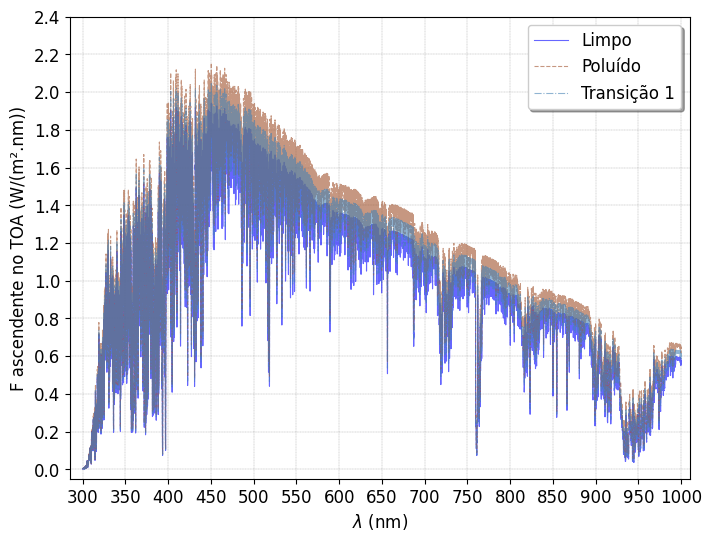

In [14]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
tf = 12
limitesx = [285, 1010]
limitesy = [-0.05, 2.4]
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
# ax.set_title("Clean X Polluted at T3", fontsize=tf)
ax.set_xlabel('$\lambda$ (nm)', fontsize=tf)
ax.set_ylabel('F ascendente no TOA (W/(m².nm))', fontsize=tf)
ax.grid(axis='both', linestyle='--', linewidth=0.22, color='grey')
ax.set(xlim=limitesx, ylim=limitesy, facecolor='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.plot(dadosl[0]['comp'], medias_ondas_l, linestyle='-', color='blue', 
        label='Limpo', alpha=0.6, linewidth=0.8)
ax.plot(dadosl[0]['comp'], medias_ondas_p, linestyle='--', color='sienna', 
        label='Poluído', alpha=0.6, linewidth=0.8)
ax.plot(dadosl[0]['comp'], medias_ondas_t2, linestyle='-.', color='steelblue', 
        label='Transição 1', alpha=0.6, linewidth=0.8)
# ax.plot(dadosl[0]['comp'], medias_ondas_t3, linestyle='-.', color='chocolate', 
#         label='Transição 2', alpha=0.2, linewidth=0.3)
# ax.plot(dadosl[0]['comp'], medias_ondas_t3, linestyle=':', color='dodgerblue', 
#         label='Transição 3', alpha=0.2, linewidth=0.3)

ax.legend(loc='best', frameon=True, fontsize=tf, ncol=1, fancybox=True, shadow=True)

# plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/FcorrigidasEspectrosPeriodos_2014.png',
#                     dpi=400, bbox_inches='tight', facecolor='white')

In [15]:
### Achando os dias que contém as medianas mínima e máxima de irrad_corrigido do período limpo:
medianaslimpo = []
for d, i in enumerate(dadosl):
    medianaslimpo.append(np.median(dadosl[d]['irrad_corrigido']))
for i in range(len(medianaslimpo)):
    if medianaslimpo[i] == np.max(medianaslimpo):
        print('{0} ---> dia {1} ---> Máx = {2}'.format(i, dadosl[i]['dia'][0], np.max(medianaslimpo)))
    elif medianaslimpo[i] == np.min(medianaslimpo):
        print('{0} ---> dia {1} ---> Min = {2}'.format(i, dadosl[i]['dia'][0], np.min(medianaslimpo)))

0 ---> dia 18/02/2014 ---> Min = 0.822511998611071
21 ---> dia 25/03/2014 ---> Máx = 1.050411543396365


In [16]:
### Achando os dias que contém as medianas mínima e máxima de irrad_corrigido do período poluído:
medianaspoluido = []
for d, i in enumerate(dadosp):
    medianaspoluido.append(np.median(dadosp[d]['irrad_corrigido']))
for i in range(len(medianaspoluido)):
    if medianaspoluido[i] == np.max(medianaspoluido):
        print('{0} ---> dia {1} ---> Máx = {2}'.format(i, dadosp[i]['dia'][0], np.max(medianaspoluido)))
    elif medianaspoluido[i] == np.min(medianaspoluido):
        print('{0} ---> dia {1} ---> Min = {2}'.format(i, dadosp[i]['dia'][0], np.min(medianaspoluido)))

66 ---> dia 24/11/2014 ---> Min = 0.85761273832648
77 ---> dia 07/12/2014 ---> Máx = 1.1624547347169447


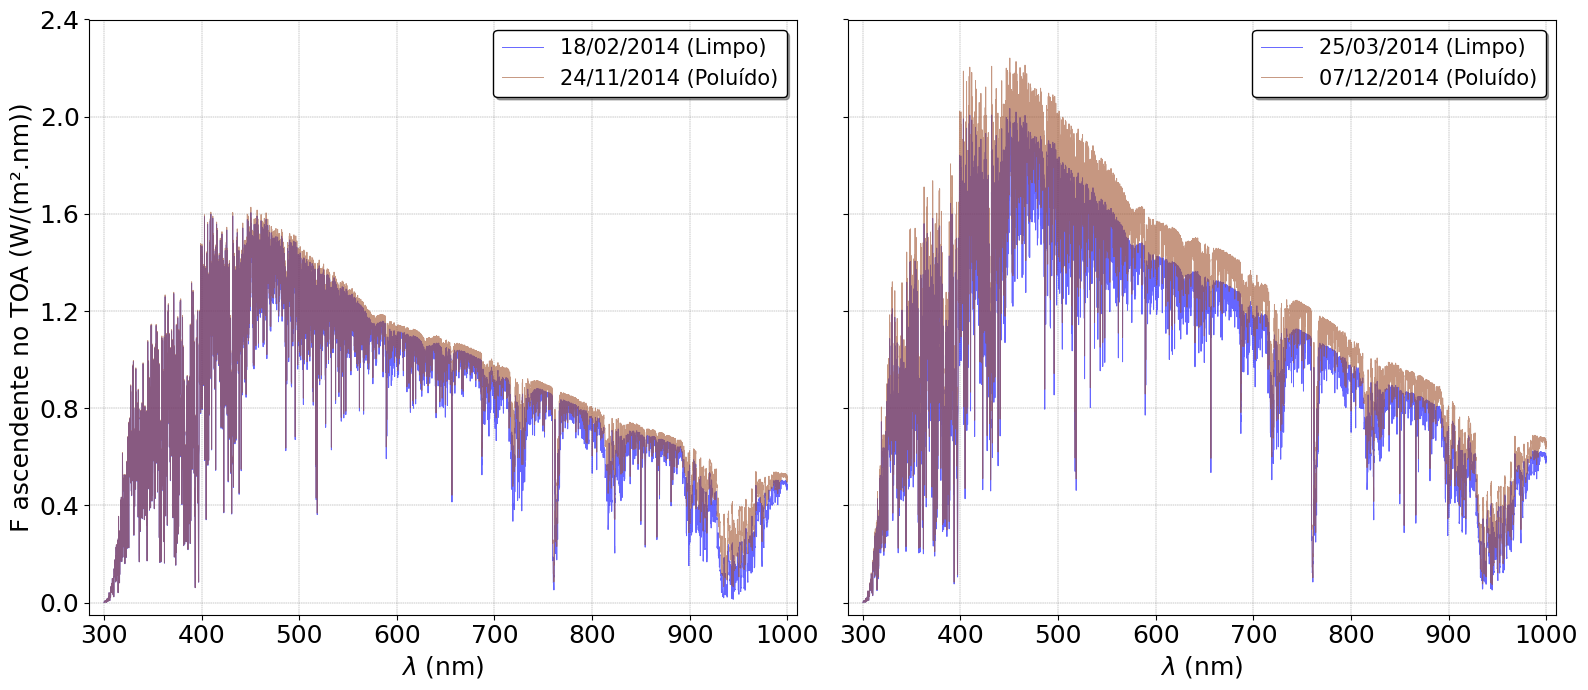

In [22]:
#### Fazendo a figura e os eixos (os "axs"):
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 7), facecolor='white')
axes = [axs[0], axs[1]]

### Setando o tamanho da fonte e cores:
tf = 18
for i in range(len(axes)):
    plt.setp(axes[i].get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
    plt.setp(axes[i].get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
    axes[i].grid(visible=True, which='both', axis='both', color='grey', linestyle='--', linewidth=0.3)
    axes[i].set(ylim=[-0.05, 2.4], facecolor='white')
    axes[i].set(xlim=[285, 1010], facecolor='white')
    axes[i].yaxis.set_major_locator(ticker.MultipleLocator(0.4))
    axes[i].xaxis.set_major_locator(ticker.MultipleLocator(100))
    
#     ## Região do UV:
#     axes[i].vlines(x=399, ymin=-0.05, ymax=2.4, colors='blueviolet', linewidth=0.60)
#     axes[i].axvspan(285, 399, facecolor='blueviolet', alpha=0.2)
#     ## Região do IV:
#     axes[i].vlines(x=750, ymin=-0.05, ymax=2.4, colors='red', linewidth=0.60)
#     axes[i].axvspan(750, 1010, facecolor='red', alpha=0.2)
    
    if i == 0:
        axes[i].set_ylabel(u'F ascendente no TOA (W/(m².nm))', fontsize=tf, color='black')
        axes[i].set_xlabel(u'$\lambda$ (nm)', fontsize=tf, color='black')
#         axes[i].set_title(u'Medianas mínimas', fontsize=tf, color='black')
        axes[i].plot(dadosl[0]['comp'], dadosl[0]['irrad_corrigido'], linestyle='-', color='blue',
                     label='{0} (Limpo)'.format(diasl[0]), alpha=0.6, linewidth=0.7)
        axes[i].plot(dadosp[66]['comp'], dadosp[66]['irrad_corrigido'], linestyle='-', color='sienna',
                     label='{0} (Poluído)'.format(diasp[66]), alpha=0.6, linewidth=0.7)
        axes[i].legend(loc='best', ncol=1, fontsize=tf-3, fancybox='True', shadow='True', frameon='True', 
                       facecolor='white', edgecolor='black')
    if i == 1:
        axes[i].set_xlabel(u'$\lambda$ (nm)', fontsize=tf, color='black')
#         axes[i].set_title(u'Medianas máximas', fontsize=tf, color='black')
        axes[i].plot(dadosl[21]['comp'], dadosl[21]['irrad_corrigido'], linestyle='-', color='blue',
                     label='{0} (Limpo)'.format(diasl[21]), alpha=0.6, linewidth=0.7)
        axes[i].plot(dadosp[77]['comp'], dadosp[77]['irrad_corrigido'], linestyle='-', color='sienna',
                     label='{0} (Poluído)'.format(diasp[77]), alpha=0.6, linewidth=0.7)
        axes[i].legend(loc='best', ncol=1, fontsize=tf-3, fancybox='True', shadow='True', frameon='True', 
                       facecolor='white', edgecolor='black')
        
plt.tight_layout()
plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/FcorrigidasEspectrosExemplos_2014.png',
                    dpi=400, bbox_inches='tight', facecolor='white')

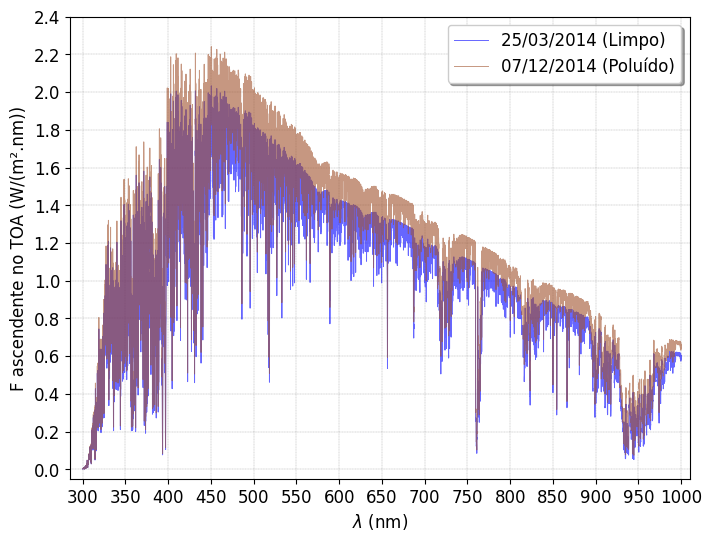

In [20]:
####### No "n" pegar o índice (posição) do dia mais limpo, e no "m" o do mais poluído:
n = 21
m = 77
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
tf = 12
limitesx = [285, 1010]
limitesy = [-0.05, 2.4]
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
# ax.set_title("Clean X Polluted at T3", fontsize=tf)
ax.set_xlabel('$\lambda$ (nm)', fontsize=tf)
ax.set_ylabel('F ascendente no TOA (W/(m².nm))', fontsize=tf)
ax.grid(axis='both', linestyle='--', linewidth=0.22, color='grey')
ax.set(xlim=limitesx, ylim=limitesy, facecolor='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

ax.plot(dadosl[n]['comp'], dadosl[n]['irrad_corrigido'], linestyle='-', color='blue',
        label='{0} (Limpo)'.format(diasl[n]), alpha=0.6, linewidth=0.7)
ax.plot(dadosp[m]['comp'], dadosp[m]['irrad_corrigido'], linestyle='-', color='sienna',
        label='{0} (Poluído)'.format(diasp[m]), alpha=0.6, linewidth=0.7)
ax.legend(loc='best', frameon=True, fontsize=tf, ncol=1, fancybox=True, shadow=True)

# plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/FcorrigidasEspectrosExemplos_2014.png',
#                     dpi=400, bbox_inches='tight', facecolor='white')

In [21]:
lista = [dadosl, dadosp, dadost2, dadost3, dadost4]
for l in lista:
    print(len(l))

29
83
101
12
19
